In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [10]:
from kunal import *

In [2]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [4]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
xtrain[0].max(),xtrain[0].min()

(255, 0)

In [7]:
#### Normalizing the data

In [8]:
xtrain = xtrain/255
xtest = xtest/255

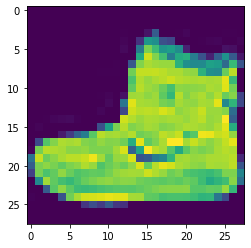

In [11]:
plt.imshow(xtrain[0])

In [13]:
ytrain[0]

9

### Building the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model = Sequential()
model.add(Conv2D(filters = 32,input_shape = (28,28,1),activation='relu',kernel_size=(2,2)))
model.add(MaxPool2D())

model.add(Flatten())

# model.add(Conv2D(filters = 64,input_shape = (28,28,1),activation='relu',kernel_size=(2,2)))
# model.add(MaxPool2D())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                346176    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 346,401
Trainable params: 346,401
Non-trainable params: 0
________________________________________________

In [46]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [47]:
xtrain.shape
xtest.shape

(10000, 28, 28, 1)

In [48]:
len(xtrain)

60000

In [49]:
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [50]:
# convertng the multiple output class variables to one hot encoded arrays

from tensorflow.keras.utils import to_categorical

ytrain_cat = to_categorical(ytrain)
ytest_cat =  to_categorical(ytest)

In [51]:
model.fit(xtrain,ytrain_cat,validation_data=(xtest,ytest_cat),epochs=10,
         callbacks=[early_stop])

ValueError: A target array with shape (60000, 10) was passed for an output of shape (None, 1) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.